### Data Loading and Preparation:

#### Importing libraries:

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Making some utility functions

In [2]:
def get_classes(data_path,classes,data):
    knee_severity={}
    count=0
    for i in range(len(classes)):
        imgs=os.listdir(os.path.join(data_path,str(i)))
        knee_severity[i]=imgs
        count+=len(imgs)
    for k,v in knee_severity.items():
        print(f"Grade {k} - {classes[k]}: {len(v)} images, {round((len(v) * 100) / count, 2)}%")
    return knee_severity

def plot(dict_classes,data_path,classes,data):
    for k,v in dict_classes.items():
        print(f"{data}-{classes[k]}")
        plt.figure(figsize=(15,25))
        for i in range(5):
            img_path=os.path.join(data_path,str(k),v[i])
            img=tf.keras.preprocessing.image.load_img(img_path)
            plt.subplot(1,5,i+1,xticks=[],yticks=[])
            plt.imshow(img)
            plt.title(f"Grade {k}")
        plt.show()

#### Load Data:

In [3]:
#class names
class_names=['Healthy','Doubtful','Minimal','Moderate','Severe']

In [4]:
base_dir="E:\Knee-OA-Analysis\dataset"
train_path=os.path.join(base_dir,'train')
test_path=os.path.join(base_dir,'test')
valid_path=os.path.join(base_dir,'val')

In [5]:
train_data=get_classes(train_path,class_names,'Train')

Grade 0 - Healthy: 2286 images, 39.56%
Grade 1 - Doubtful: 1046 images, 18.1%
Grade 2 - Minimal: 1516 images, 26.24%
Grade 3 - Moderate: 757 images, 13.1%
Grade 4 - Severe: 173 images, 2.99%


In [6]:
test_data=get_classes(test_path,class_names,'Test')

Grade 0 - Healthy: 639 images, 38.59%
Grade 1 - Doubtful: 296 images, 17.87%
Grade 2 - Minimal: 447 images, 26.99%
Grade 3 - Moderate: 223 images, 13.47%
Grade 4 - Severe: 51 images, 3.08%


In [7]:
valid_data=get_classes(valid_path,class_names,'Valid')

Grade 0 - Healthy: 328 images, 39.71%
Grade 1 - Doubtful: 153 images, 18.52%
Grade 2 - Minimal: 212 images, 25.67%
Grade 3 - Moderate: 106 images, 12.83%
Grade 4 - Severe: 27 images, 3.27%


### Data Visualization

#### Train data

Train Data-Healthy


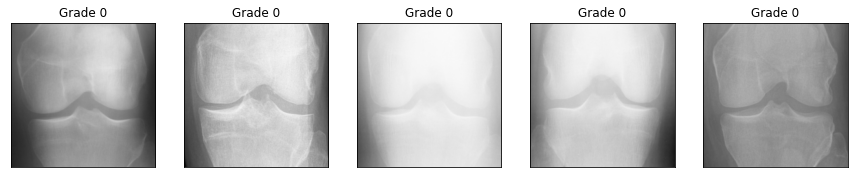

Train Data-Doubtful


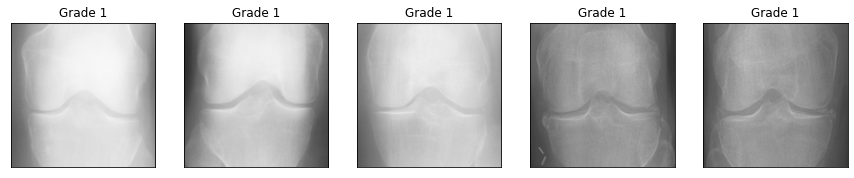

Train Data-Minimal


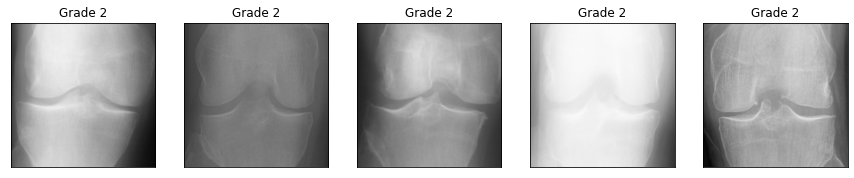

Train Data-Moderate


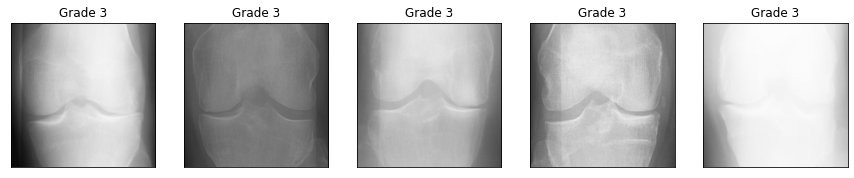

Train Data-Severe


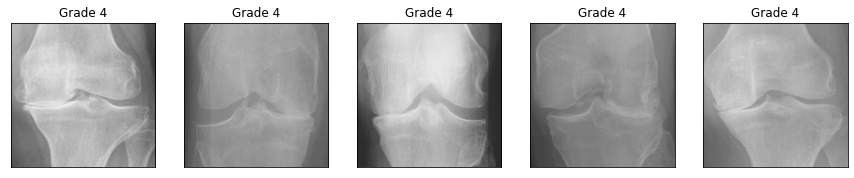

In [8]:
plot(train_data,train_path,class_names,'Train Data')

#### Test Data

Test Data-Healthy


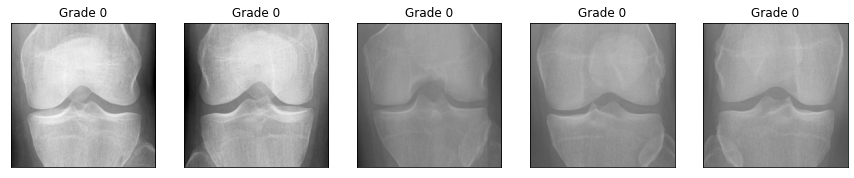

Test Data-Doubtful


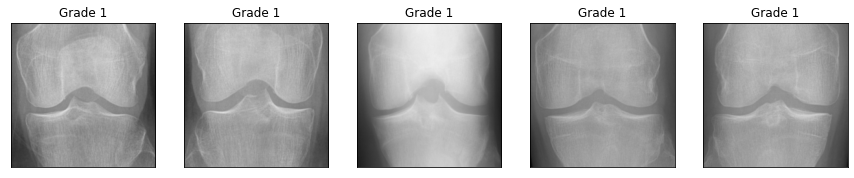

Test Data-Minimal


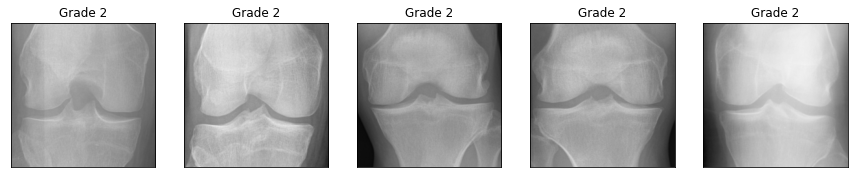

Test Data-Moderate


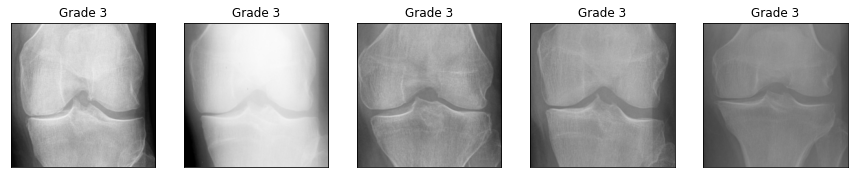

Test Data-Severe


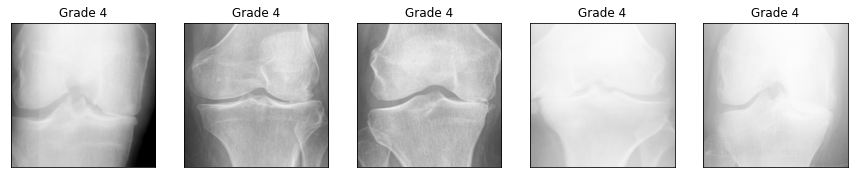

In [9]:
plot(test_data,test_path,class_names,'Test Data')

#### Valid Data

Valid Data-Healthy


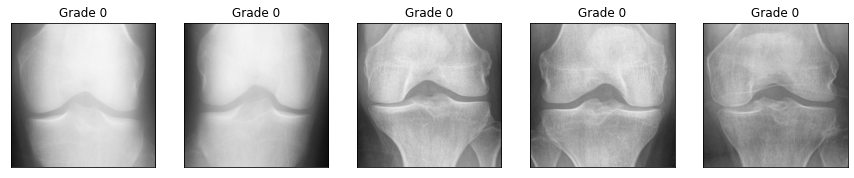

Valid Data-Doubtful


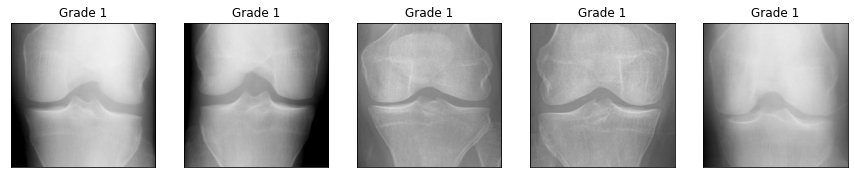

Valid Data-Minimal


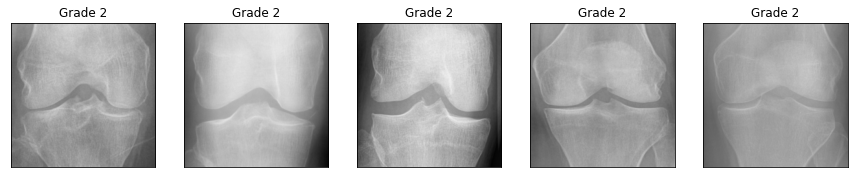

Valid Data-Moderate


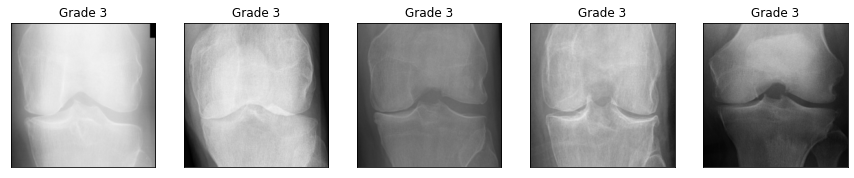

Valid Data-Severe


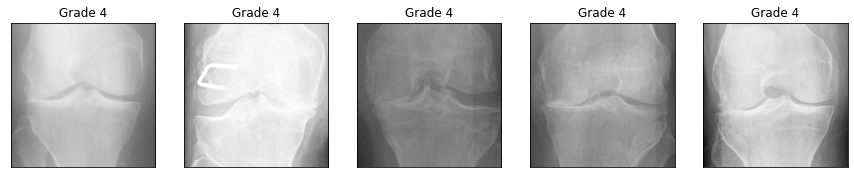

In [10]:
plot(valid_data,valid_path,class_names,'Valid Data')

#### Image data generator examples : Data Augmentation options like Brightness,Zoom,Horizontal Flip,Width shift


#### Brightness range

Found 5778 images belonging to 5 classes.


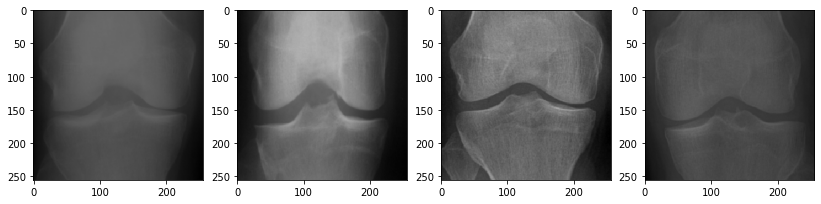

In [11]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.4,0.8])
imagegen=datagen.flow_from_directory(train_path,batch_size=1)
fig,rows=plt.subplots(nrows=1,ncols=4,figsize=(14,14))
for r in rows:
    r.imshow(imagegen.next()[0][0].astype("uint8"))
plt.show()

#### Width shift

Found 5778 images belonging to 5 classes.


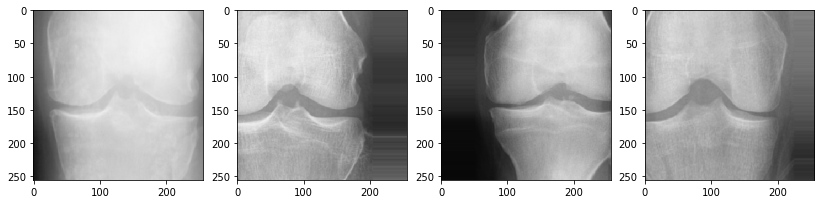

In [12]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=[-50,0,50,30,-30])
imagegen=datagen.flow_from_directory(train_path,batch_size=1)
fig,rows=plt.subplots(nrows=1,ncols=4,figsize=(14,14))
for r in rows:
    r.imshow(imagegen.next()[0][0].astype("uint8"))
plt.show()

#### Zoom Range:

Found 5778 images belonging to 5 classes.


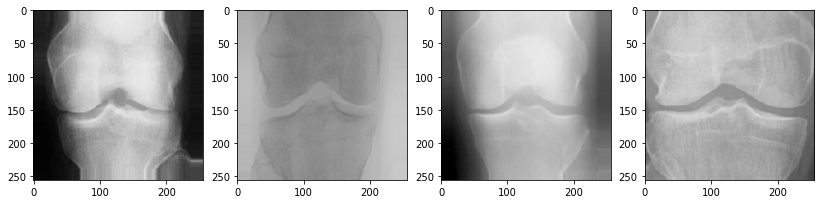

In [13]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.25)
imagegen=datagen.flow_from_directory(train_path,batch_size=1)
fig,rows=plt.subplots(nrows=1,ncols=4,figsize=(14,14))
for r in rows:
    r.imshow(imagegen.next()[0][0].astype("uint8"))
plt.show()

#### Horizontal Flip:

Found 5778 images belonging to 5 classes.


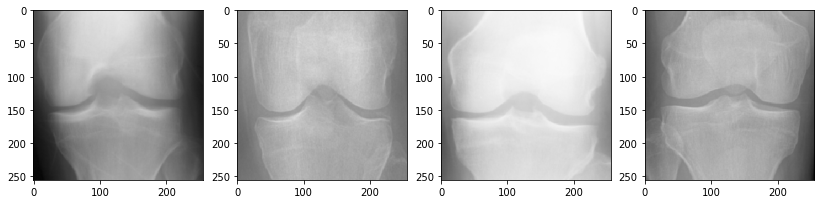

In [14]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
imagegen=datagen.flow_from_directory(train_path,batch_size=1)
fig,rows=plt.subplots(nrows=1,ncols=4,figsize=(14,14))
for r in rows:
    r.imshow(imagegen.next()[0][0].astype("uint8"))
plt.show()

### Applying augmentation with image data generator and preprocessing that

In [15]:
aug_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.4,0.8],
    width_shift_range=[-50,0,50,30,-30],
    zoom_range=0.1,
    fill_mode="nearest",
)
noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,)

### Making train and Valid data set with and without augmentation respectively

In [16]:
target_size=(224,224)
train_generator=aug_datagen.flow_from_directory(train_path,class_mode="categorical",target_size=target_size,shuffle=True)
valid_generator=noaug_datagen.flow_from_directory(valid_path,class_mode="categorical",target_size=target_size,shuffle=False)

Found 5778 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [17]:
y_train=train_generator.labels
y_val=valid_generator.labels

#### This was basic intro for data, now need to make certain CNN architectures to get the best possible accuracy, Will make a util class to contain basic functions also need to take care of class imbalance so need to find class weights and then use that while training model.